In [18]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost lightgbm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\gustavo.aivazoglou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [20]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '3'  # Altere '4' para o número adequado de núcleos lógicos

In [21]:
#import csv
df = pd.read_csv(r"C:\Users\gustavo.aivazoglou\Downloads\DNOPEN23_final.csv", sep=';', on_bad_lines='skip')

In [22]:
df.columns

Index(['ID', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE',
       'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'GRAVIDEZ', 'PARTO', 'PESO',
       'OPORT_DN', 'NATURALMAE', 'ESCMAE2010', 'SERIESCMAE', 'RACACORMAE',
       'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'ESCMAEAGR1'],
      dtype='object')

In [23]:
# Fill NaN values with 0
df['IDADEPAI'] = df['IDADEPAI'].fillna(0)
df['CODOCUPMAE'] = df['CODOCUPMAE'].fillna(0)
df = df.drop(['ID'], axis=1)

df = df.dropna()

df['PESO'] = pd.to_numeric(df['PESO'], errors='coerce')
bins = [0, 1000, 1500, 2500, 4000, float('inf')]  # Faixas de peso (limites superiores de cada faixa)
labels = ['Muito Baixo', 'Extremo Baixo', 'Baixo', 'Médio', 'Muito Alto']  # Rótulos das faixas
# Aplicando pd.cut para categorizar a coluna 'PESO' conforme as faixas definidas
df['PESO_ranges'] = pd.cut(df['PESO'], bins=bins, labels=labels, right=False)

# Transform values based on condition
df['IDADEPAI'] = df['IDADEPAI'].apply(lambda x: 1 if x > 0 else 0)

df = df.drop(['PESO'], axis=1)

In [24]:
contagem = df['PESO_ranges'].value_counts()
print(contagem)

PESO_ranges
Médio            560580
Baixo             53041
Muito Alto        27978
Extremo Baixo      5252
Muito Baixo        4303
Name: count, dtype: int64


In [25]:
nan_counts = df.isna().sum()
nan_counts

LOCNASC        0
IDADEMAE       0
ESTCIVMAE      0
ESCMAE         0
CODOCUPMAE     0
QTDFILVIVO     0
QTDFILMORT     0
CODMUNRES      0
GRAVIDEZ       0
PARTO          0
OPORT_DN       0
NATURALMAE     0
ESCMAE2010     0
SERIESCMAE     0
RACACORMAE     0
QTDGESTANT     0
QTDPARTNOR     0
QTDPARTCES     0
IDADEPAI       0
ESCMAEAGR1     0
PESO_ranges    0
dtype: int64

In [26]:
df = df.dropna()

In [27]:
len(df)

651154

In [28]:
lista_str= ['LOCNASC','ESTCIVMAE','ESCMAE','CODOCUPMAE','CODMUNRES','GRAVIDEZ','PARTO','NATURALMAE','ESCMAE2010','RACACORMAE','ESCMAEAGR1']
df[lista_str] = df[lista_str].astype(str)

In [29]:
# Colunas numéricas
numericas = list(df.select_dtypes(include=['int64', 'float64']).columns)
# Colunas categoricas
categoricas = list(df.select_dtypes(include='object').columns)

In [30]:
# Calculate unique value counts for categorical columns
unique_counts = df[categoricas].nunique()
# Identify columns with more than 20 unique values
columns_to_drop = unique_counts[unique_counts > 1000].index
# Drop the identified columns from the test DataFrame
train_2 = df.drop(columns=columns_to_drop)
print(columns_to_drop)

categoricas = list(train_2.select_dtypes(include='object').columns)

train_dummies = pd.get_dummies(train_2, columns = categoricas, drop_first=True)
#test_dummies = test_dummies.drop(columns = categoricas)

Index(['CODOCUPMAE', 'CODMUNRES'], dtype='object')


In [31]:
X = train_dummies.drop('PESO_ranges', axis=1)
y = train_dummies['PESO_ranges']

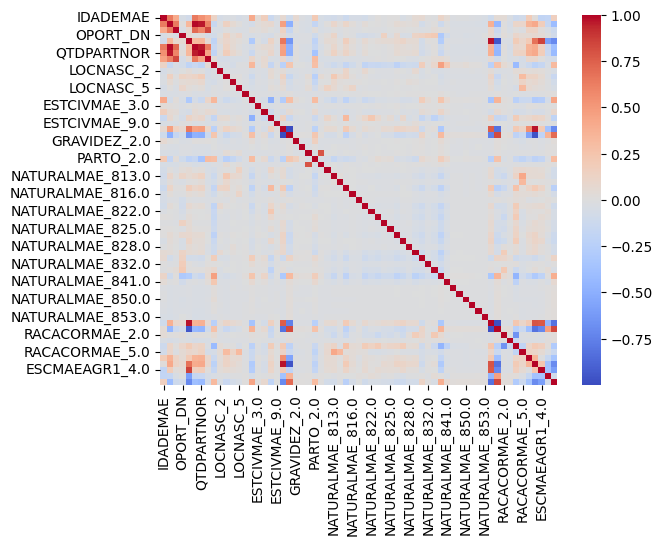

In [32]:
# Calculate the correlation matrix, explicitly excluding non-numeric columns
matrix_corr = train_dummies.corr(method='pearson', numeric_only=True)

heatmap_matriz = matrix_corr

x = heatmap_matriz.index

sns.heatmap(heatmap_matriz[x].corr(method='pearson'), cmap='coolwarm')
plt.show()

In [33]:
train_dummies.columns

Index(['IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'OPORT_DN', 'SERIESCMAE',
       'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'PESO_ranges',
       'LOCNASC_2', 'LOCNASC_3', 'LOCNASC_4', 'LOCNASC_5', 'LOCNASC_9',
       'ESTCIVMAE_2.0', 'ESTCIVMAE_3.0', 'ESTCIVMAE_4.0', 'ESTCIVMAE_5.0',
       'ESTCIVMAE_9.0', 'ESCMAE_3.0', 'ESCMAE_4.0', 'GRAVIDEZ_2.0',
       'GRAVIDEZ_3.0', 'GRAVIDEZ_9.0', 'PARTO_2.0', 'PARTO_9.0',
       'NATURALMAE_812.0', 'NATURALMAE_813.0', 'NATURALMAE_814.0',
       'NATURALMAE_815.0', 'NATURALMAE_816.0', 'NATURALMAE_817.0',
       'NATURALMAE_821.0', 'NATURALMAE_822.0', 'NATURALMAE_823.0',
       'NATURALMAE_824.0', 'NATURALMAE_825.0', 'NATURALMAE_826.0',
       'NATURALMAE_827.0', 'NATURALMAE_828.0', 'NATURALMAE_829.0',
       'NATURALMAE_831.0', 'NATURALMAE_832.0', 'NATURALMAE_833.0',
       'NATURALMAE_835.0', 'NATURALMAE_841.0', 'NATURALMAE_842.0',
       'NATURALMAE_843.0', 'NATURALMAE_850.0', 'NATURALMAE_851.0',
       'NATURALMAE_852.0', 'NATURAL

In [34]:
print(train_dummies.dtypes)

IDADEMAE             float64
QTDFILVIVO           float64
QTDFILMORT           float64
OPORT_DN               int64
SERIESCMAE           float64
QTDGESTANT           float64
QTDPARTNOR           float64
QTDPARTCES           float64
IDADEPAI               int64
PESO_ranges         category
LOCNASC_2               bool
LOCNASC_3               bool
LOCNASC_4               bool
LOCNASC_5               bool
LOCNASC_9               bool
ESTCIVMAE_2.0           bool
ESTCIVMAE_3.0           bool
ESTCIVMAE_4.0           bool
ESTCIVMAE_5.0           bool
ESTCIVMAE_9.0           bool
ESCMAE_3.0              bool
ESCMAE_4.0              bool
GRAVIDEZ_2.0            bool
GRAVIDEZ_3.0            bool
GRAVIDEZ_9.0            bool
PARTO_2.0               bool
PARTO_9.0               bool
NATURALMAE_812.0        bool
NATURALMAE_813.0        bool
NATURALMAE_814.0        bool
NATURALMAE_815.0        bool
NATURALMAE_816.0        bool
NATURALMAE_817.0        bool
NATURALMAE_821.0        bool
NATURALMAE_822

In [42]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Supõe que 'train_dummies' já foi carregado

# Variável dependente e independentes
X = train_dummies.drop(columns=["PESO_ranges"])  # Remove a variável alvo
y = train_dummies["PESO_ranges"].astype('category')  # Certifique-se de que é categórico

# Combinar X e y para facilitar a manipulação
df_full = pd.concat([X, y], axis=1)

# Identificar as classes menos representadas
frequencias = y.value_counts()
classe_mais_frequente = frequencias.max()

# Reamostrar as classes menos representadas
classes_a_balancear = frequencias[frequencias < classe_mais_frequente].index
dfs_balanceados = [df_full[df_full["PESO_ranges"] == cls].sample(
    n=classe_mais_frequente, 
    replace=True,  # Permitir duplicação
    random_state=42
) for cls in classes_a_balancear]

# Combinar as classes balanceadas com a classe mais frequente
df_balanceado = pd.concat([df_full[df_full["PESO_ranges"] == frequencias.idxmax()]] + dfs_balanceados)

# Separar novamente em X e y
X_balanced = df_balanceado.drop(columns=["PESO_ranges"])
y_balanced = df_balanceado["PESO_ranges"]

# Divisão dos dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Limpar valores ausentes (se necessário)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Dataset no formato LightGBM
train_data = lgb.Dataset(X_train, label=y_train.cat.codes)
test_data = lgb.Dataset(X_test, label=y_test.cat.codes)

# Parâmetros do modelo
params = {
    'objective': 'multiclass',
    'num_class': y.nunique(),  # Número de classes
    'boosting_type': 'gbdt',   # Tipo de boosting
    'metric': 'multi_logloss', # Métrica de avaliação
    'learning_rate': 0.05,     # Taxa de aprendizado
    'max_depth': 7,            # Profundidade máxima
    'num_leaves': 20,          # Número de leaves
}

# Treinamento do modelo com early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,       # Número máximo de iterações
    valid_sets=[test_data],     # Dados de validação
    callbacks=[
        lgb.early_stopping(stopping_rounds=10),
    ]
)

# Previsões
y_pred = model.predict(X_test)  # Previsões de probabilidades
y_pred_classes = y_pred.argmax(axis=1)  # Converte para rótulos de classe

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test.cat.codes, y_pred_classes))
print("\nRelatório de Classificação:\n", classification_report(y_test.cat.codes, y_pred_classes))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 2242320, number of used features: 63
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's multi_logloss: 1.31461
Acurácia: 0.46221770309322485

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57    112116
           1       0.55      0.54      0.54    112116
    

In [48]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Supõe que 'train_dummies' já foi carregado

# Variável dependente e independentes
X = train_dummies.drop(columns=["PESO_ranges"])  # Remove a variável alvo
y = train_dummies["PESO_ranges"].astype('category')  # Certifique-se de que é categórico

# Combinar X e y para facilitar a manipulação
df_full = pd.concat([X, y], axis=1)

# Identificar as classes menos representadas
frequencias = y.value_counts()
classe_mais_frequente = frequencias.max()

# Reamostrar as classes menos representadas
classes_a_balancear = frequencias[frequencias < classe_mais_frequente].index
dfs_balanceados = [df_full[df_full["PESO_ranges"] == cls].sample(
    n=classe_mais_frequente, 
    replace=True,  # Permitir duplicação
    random_state=42
) for cls in classes_a_balancear]

# Combinar as classes balanceadas com a classe mais frequente
df_balanceado = pd.concat([df_full[df_full["PESO_ranges"] == frequencias.idxmax()]] + dfs_balanceados)

# Separar novamente em X e y
X_balanced = df_balanceado.drop(columns=["PESO_ranges"])
y_balanced = df_balanceado["PESO_ranges"]

# Divisão dos dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Limpar valores ausentes (se necessário)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Dataset no formato LightGBM
train_data = lgb.Dataset(X_train, label=y_train.cat.codes)
test_data = lgb.Dataset(X_test, label=y_test.cat.codes)

# Parâmetros do modelo
params = {
    'objective': 'multiclass',
    'num_class': y.nunique(),  # Número de classes
    'boosting_type': 'gbdt',   # Tipo de boosting
    'metric': 'multi_logloss', # Métrica de avaliação
    'learning_rate': 0.12,     # Taxa de aprendizado
    'max_depth': 14,            # Profundidade máxima
    'num_leaves': 60,  
    'lambda_l1': 0.1,                 # Regularização L1
    'lambda_l2': 0.1     # Número de leaves
}

# Treinamento do modelo com early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=2500,       # Número máximo de iterações
    valid_sets=[test_data],     # Dados de validação
    callbacks=[
        lgb.early_stopping(stopping_rounds=10),
    ]
)

# Previsões
y_pred = model.predict(X_test)  # Previsões de probabilidades
y_pred_classes = y_pred.argmax(axis=1)  # Converte para rótulos de classe

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test.cat.codes, y_pred_classes))
print("\nRelatório de Classificação:\n", classification_report(y_test.cat.codes, y_pred_classes))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.128592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 2242320, number of used features: 63
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[2500]	valid_0's multi_logloss: 0.505649
Acurácia: 0.8407488672446395

Relatório de Classificação:
               pre

In [50]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Supõe que 'train_dummies' já foi carregado

# Variável dependente e independentes
X = train_dummies.drop(columns=["PESO_ranges"])  # Remove a variável alvo
y = train_dummies["PESO_ranges"].astype('category')  # Certifique-se de que é categórico

# Combinar X e y para facilitar a manipulação
df_full = pd.concat([X, y], axis=1)

# Identificar as classes menos representadas
frequencias = y.value_counts()
classe_mais_frequente = frequencias.max()

# Reamostrar as classes menos representadas
classes_a_balancear = frequencias[frequencias < classe_mais_frequente].index
dfs_balanceados = [df_full[df_full["PESO_ranges"] == cls].sample(
    n=classe_mais_frequente, 
    replace=True,  # Permitir duplicação
    random_state=42
) for cls in classes_a_balancear]

# Combinar as classes balanceadas com a classe mais frequente
df_balanceado = pd.concat([df_full[df_full["PESO_ranges"] == frequencias.idxmax()]] + dfs_balanceados)

# Separar novamente em X e y
X_balanced = df_balanceado.drop(columns=["PESO_ranges"])
y_balanced = df_balanceado["PESO_ranges"]

# StratifiedKFold para garantir que cada fold tenha a mesma distribuição de classes
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parâmetros do modelo
params = {
    'objective': 'multiclass',
    'num_class': y.nunique(),  # Número de classes
    'boosting_type': 'gbdt',   # Tipo de boosting
    'metric': 'multi_logloss', # Métrica de avaliação
    'learning_rate': 0.12,     # Taxa de aprendizado
    'max_depth': 14,           # Profundidade máxima
    'num_leaves': 60,  
    'lambda_l1': 0.1,          # Regularização L1
    'lambda_l2': 0.1           # Regularização L2
}

# Lista para armazenar os resultados de cada fold
cv_results = []

# Realizando a cross-validation
for train_index, valid_index in kf.split(X_balanced, y_balanced):
    # Separar os dados de treino e validação para cada fold
    X_train, X_valid = X_balanced.iloc[train_index], X_balanced.iloc[valid_index]
    y_train, y_valid = y_balanced.iloc[train_index], y_balanced.iloc[valid_index]
    
    # Criar os datasets para o LightGBM
    train_data = lgb.Dataset(X_train, label=y_train.cat.codes)
    valid_data = lgb.Dataset(X_valid, label=y_valid.cat.codes)
    
    # Treinamento do modelo
    model = lgb.train(
        params,
        train_data,
        num_boost_round=2500,
        valid_sets=[valid_data],
        callbacks=[lgb.early_stopping(stopping_rounds=10)]
    )
    
    # Prever nos dados de validação
    y_pred = model.predict(X_valid)
    y_pred_classes = y_pred.argmax(axis=1)  # Converte para rótulos de classe
    
    # Avaliar o modelo com a acurácia
    accuracy = accuracy_score(y_valid.cat.codes, y_pred_classes)
    cv_results.append(accuracy)

# Exibir a média da acurácia dos folds
print(f'Média da Acurácia: {np.mean(cv_results):.4f}')
print(f'Desvio padrão da Acurácia: {np.std(cv_results):.4f}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.219736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 489
[LightGBM] [Info] Number of data points in the train set: 2242320, number of used features: 63
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 10 rounds


KeyboardInterrupt: 

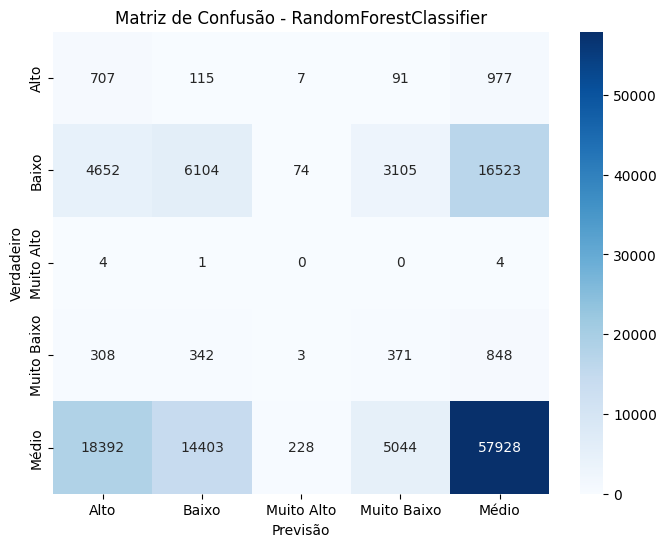

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_RFC)

# Definir os rótulos das classes
labels = ['Alto', 'Baixo', 'Muito Alto', 'Muito Baixo', 'Médio']

# Criar o heatmap com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Títulos e rótulos
plt.title('Matriz de Confusão - RandomForestClassifier')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.show()
